In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pvlib
import cpvsystem as cpvlib

module_params = {
    "gamma_ref": 5.524,
    "mu_gamma": 0.003,
    "I_L_ref": 0.96,
    "I_o_ref": 0.00000000017,
    "R_sh_ref": 5226,
    "R_sh_0": 21000,
    "R_sh_exp": 5.50,
    "R_s": 0.01,
    "alpha_sc": 0.00,
    "EgRef": 3.91,
    "irrad_ref": 1000,
    "temp_ref": 25,
    "cells_in_series": 12,
    "cells_in_parallel": 48,
    "eta_m": 0.32,
    "alpha_absorption": 0.9,
    "Area": 1.2688,
    "Impo": 8.3,
    "Vmpo": 43.9,
}

UF_parameters = {
    "IscDNI_top": 0.96 / 1000,
    "aoi_thld": 61.978505569631494,
    "aoi_uf_m_low": -2.716773886925838e-07,
    "aoi_uf_m_high": -1.781998474992582e-05,
    "am_thld": 4.574231933073185,
    "am_uf_m_low": 3.906372068620377e-06,
    "am_uf_m_high": -3.0335768119184845e-05,
    "ta_thld": 50,
    "ta_uf_m_low": 4.6781224141650075e-06,
    "ta_uf_m_high": 0,
    "weight_am": 0.2,
    "weight_temp": 0.8,
}

module_params.update(UF_parameters)

In [2]:
static_cpv_sys = cpvlib.StaticCPVSystem(
    surface_tilt=30,
    surface_azimuth=180,
    module=None,
    module_parameters=module_params,
    modules_per_string=1,
    strings_per_inverter=1,
    inverter=None,
    inverter_parameters=None,
    racking_model="insulated",
    losses_parameters=None,
    name=None,
)

#%% pmp_norm vs aoi
cpv_pmp_norm = pd.Series({
    0.0: 1.00,
    9.2: 0.96,
    18.5: 0.88,
    26.3: 0.78,
    32.7: 0.65,
    37.3: 0.53,
    40.5: 0.47,
    49.9: 0.24
    })

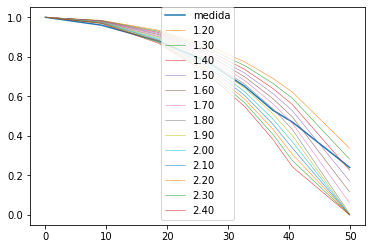

In [3]:
#%% IAM - 
plt.plot(cpv_pmp_norm.index, cpv_pmp_norm.values, label='medida')

for b in np.arange(start=1.2, stop=2.5, step=0.1):
    plt.plot(cpv_pmp_norm.index, pvlib.iam.ashrae(cpv_pmp_norm.index, b=b), label="{0:.2f}".format(b), linewidth=0.5)

plt.legend()

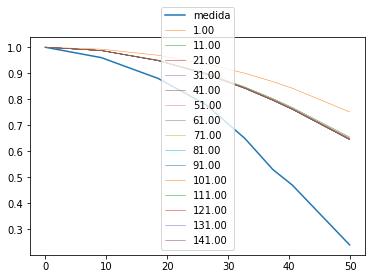

In [4]:
plt.plot(cpv_pmp_norm.index, cpv_pmp_norm.values, label='medida')

for a_r in np.arange(start=1, stop=150, step=10):
    plt.plot(cpv_pmp_norm.index, pvlib.iam.martin_ruiz(cpv_pmp_norm.index, a_r=a_r), label="{0:.2f}".format(a_r), linewidth=0.5)

plt.legend()